In [1]:
def print_and_save(text, filename):
    print(text)
    with open(filename, 'w') as f:
        f.write(str(text))

In [2]:
import matplotlib.pyplot as plt
import os
os.makedirs('../output/reddit_output', exist_ok=True)


In [3]:
import os

output_dir = '../output'  # or './reddit_output' if you want it in your current folder
os.makedirs(output_dir, exist_ok=True)

In [4]:
import sys
sys.path.append('../src')
from cleaning import load_and_clean_all_reddit_posts

# Here you provide the folder path!
reddit_posts = load_and_clean_all_reddit_posts('../Data/Reddit')

reddit_posts.head()

,post_id,content,author,date,category,num_comments,score,upvote_ratio,url
0,1m1puv4,is she sabotaging things i dont know what to d...,Artistlk,2025-07-16 21:57:52+00:00,addiction,0,1,1.0,https://www.reddit.com/r/addiction/comments/1m...
1,1m1osj2,i just crave the silence all i crave is silenc...,Exciting-Parsley-476,2025-07-16 21:14:59+00:00,addiction,1,1,1.0,https://www.reddit.com/r/addiction/comments/1m...
2,1m1nymh,being an addict around worse addicts 18 uk i ...,Particular-Truck7897,2025-07-16 20:42:13+00:00,addiction,1,1,1.0,https://www.reddit.com/r/addiction/comments/1m...
3,1m1ng2l,how to overcome any type on addiction for the...,Effective-Vast-5050,2025-07-16 20:22:05+00:00,addiction,3,3,1.0,https://www.reddit.com/r/addiction/comments/1m...
4,1m1k697,found zyn in my dads drawer accidentally what ...,DanDaDanFan,2025-07-16 18:17:54+00:00,addiction,24,0,0.4,https://www.reddit.com/r/addiction/comments/1m...


In [5]:
# How many posts do you have?
print("Total posts:", len(reddit_posts))

# What columns are there?
print("Columns:", reddit_posts.columns.tolist())

Total posts: 68047
Columns: ['post_id', 'content', 'author', 'date', 'category', 'num_comments', 'score', 'upvote_ratio', 'url']


In [6]:
import sys
sys.path.append('../src')
from cleaning import load_and_clean_all_reddit_comments

reddit_comments = load_and_clean_all_reddit_comments('../Data/Reddit')

print("Total comments:", len(reddit_comments))
print("Columns:", reddit_comments.columns.tolist())

reddit_comments.head()

Total comments: 889153
Columns: ['comment_id', 'post_id', 'content', 'author', 'date', 'order', 'score', 'parent_id', 'link_id', 'permalink']


,comment_id,post_id,content,author,date,order,score,parent_id,link_id,permalink
0,n3im5vo,1m1osj2,dont forget to check out our resources wiki pa...,AutoModerator,2025-07-16 21:15:00+00:00,1,1,t3_1m1osj2,t3_1m1osj2,/r/addiction/comments/1m1osj2/i_just_crave_the...
1,n3iewia,1m1nymh,dont forget to check out our resources wiki pa...,AutoModerator,2025-07-16 20:42:17+00:00,1,1,t3_1m1nymh,t3_1m1nymh,/r/addiction/comments/1m1nymh/being_an_addict_...
2,n3iae4z,1m1ng2l,dont forget to check out our resources wiki pa...,AutoModerator,2025-07-16 20:22:05+00:00,1,1,t3_1m1ng2l,t3_1m1ng2l,/r/addiction/comments/1m1ng2l/how_to_overcome_...
3,n3idl6x,1m1ng2l,you need a therapist seriously i dont think th...,folgerscoffees,2025-07-16 20:36:23+00:00,2,1,t3_1m1ng2l,t3_1m1ng2l,/r/addiction/comments/1m1ng2l/how_to_overcome_...
4,n3igkeq,1m1ng2l,i think i have a method basically you put up a...,eni95,2025-07-16 20:49:39+00:00,3,1,t3_1m1ng2l,t3_1m1ng2l,/r/addiction/comments/1m1ng2l/how_to_overcome_...


In [7]:
import pandas as pd

# Remove timezones from datetime columns in both DataFrames
for df in [reddit_posts, reddit_comments]:
    for col in df.select_dtypes(include=['datetimetz']).columns:
        df[col] = df[col].dt.tz_localize(None)

reddit_posts.head(100).to_csv(f'{output_dir}/reddit_posts_sample.csv', index=False)
reddit_comments.head(100).to_csv(f'{output_dir}/reddit_comments_sample.csv', index=False)

with pd.ExcelWriter(f'{output_dir}/reddit_samples.xlsx') as writer:
    reddit_posts.head(100).to_excel(writer, sheet_name='Posts', index=False)
    reddit_comments.head(100).to_excel(writer, sheet_name='Comments', index=False)

In [8]:
# Posts
print(f"Number of posts: {len(reddit_posts)}")
# Comments
print(f"Number of comments: {len(reddit_comments)}")


Number of posts: 68047
Number of comments: 889153


In [19]:
reddit_posts = reddit_posts.drop_duplicates(subset=['post_id'])
reddit_comments = reddit_comments.drop_duplicates(subset=['comment_id'])

In [20]:
import re

def has_emoji(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        "]+", flags=re.UNICODE)
    return bool(emoji_pattern.search(str(text)))

# Count comments with emojis
emoji_count = reddit_comments['content'].apply(has_emoji).sum()
print(f"Comments with emojis: {emoji_count}")

Comments with emojis: 0


In [21]:
reddit_comments['content'].str.contains(r'[^A-Za-z0-9\s.,!?]').sum()

np.int64(0)

In [22]:
print(reddit_comments['content'].sample(20).tolist())

['on one hand i suck in person and have social anxiey to a degree so i just appear unapproachable on the other hand i feel like people online dont want to really know one another and mostly seek to gain of course its not that straight forward social media is really toxic and over the years too many cases were brought up because of it  on top of algorithms exposing horrors just because its trendy nowadays however there are still genuine people somewhere', ' i cant comment because of negative k but i like to advise people who suffer from anxiety and depression you can do some philosophical exercises and meditation to relieve stress  to get an idea of how bad it is heres a simple test that will test for depression you get the answer directly takes less than 2 minutes you can skip the demographic part answer how youve felt in the last two weeks not one if youve scored over 10 you should take it more seriously  heres a list of symptoms associated with depression so you can double check  if 

In [23]:
print(reddit_comments['content'].isin(['[deleted]','[removed]']).sum())

0


In [24]:
print((reddit_comments['content'].str.strip() == '').sum())
print((reddit_comments['content'].str.len() < 5).sum())

3420
10745


In [25]:
print(reddit_comments['content'].isnull().sum())
print(reddit_comments['content'].dtype)

0
object


In [33]:
import emoji

def contains_emoji(s):
    return bool(emoji.emoji_list(str(s)))

emoji_count = reddit_comments['content'].apply(contains_emoji).sum()
print(f"Comments with emojis: {emoji_count}")

Comments with emojis: 0


In [27]:
print(reddit_comments['content'].str.contains('http|www|<.*?>', regex=True).sum())

473


In [34]:
# Remove '[deleted]' and '[removed]' comments
reddit_comments = reddit_comments[~reddit_comments['content'].isin(['[deleted]', '[removed]'])]

# Remove empty or very short comments
reddit_comments = reddit_comments[reddit_comments['content'].str.strip().str.len() > 5]

# Normalize text
reddit_comments['content'] = reddit_comments['content'].str.lower().str.strip()

# Remove URLs
reddit_comments['content'] = reddit_comments['content'].str.replace(r'http\S+|www\S+', '', regex=True)

In [45]:
reddit_comments = reddit_comments[reddit_comments['length'] > 0]

In [35]:
#cleaning post
#
import re
import html

# Remove duplicate posts by post_id
reddit_posts = reddit_posts.drop_duplicates(subset=['post_id'])

# Remove '[deleted]' and '[removed]' content
reddit_posts = reddit_posts[~reddit_posts['content'].isin(['[deleted]', '[removed]'])]

# Remove empty or very short posts (length <= 5 after stripping whitespace)
reddit_posts = reddit_posts[reddit_posts['content'].str.strip().str.len() > 5]

# Normalize text: lowercase & strip whitespace
reddit_posts['content'] = reddit_posts['content'].str.lower().str.strip()
if 'title' in reddit_posts.columns:
    reddit_posts['title'] = reddit_posts['title'].str.lower().str.strip()

# Remove URLs from content and title
reddit_posts['content'] = reddit_posts['content'].str.replace(r'http\S+|www\S+', '', regex=True)
if 'title' in reddit_posts.columns:
    reddit_posts['title'] = reddit_posts['title'].str.replace(r'http\S+|www\S+', '', regex=True)

# Remove user mentions and subreddit mentions from content
reddit_posts['content'] = reddit_posts['content'].str.replace(r'/u/\w+', '', regex=True)
reddit_posts['content'] = reddit_posts['content'].str.replace(r'/r/\w+', '', regex=True)

# Unescape HTML entities in content
reddit_posts['content'] = reddit_posts['content'].apply(html.unescape)

# OPTIONAL: Remove markdown formatting from content
reddit_posts['content'] = reddit_posts['content'].str.replace(r'\*\*(.*?)\*\*|\*(.*?)\*|\[(.*?)\]\(.*?\)|!\[(.*?)\]\(.*?\)', '', regex=True)

# Remove excessive repeated characters (e.g., "soooo coool!!!")
reddit_posts['content'] = reddit_posts['content'].str.replace(r'(.)\1{2,}', r'\1\1', regex=True)

# Remove extra punctuation (limit exclamation marks to one)
reddit_posts['content'] = reddit_posts['content'].str.replace(r'!{2,}', '!', regex=True)

# (Optional) Remove remaining special characters except basic punctuation
reddit_posts['content'] = reddit_posts['content'].str.replace(r'[^a-zA-Z0-9\s.,!?]', '', regex=True)

# Reset index after cleaning
reddit_posts = reddit_posts.reset_index(drop=True)

print('reddit_posts cleaned successfully.')

reddit_posts cleaned successfully.


In [46]:
#save clean data
reddit_posts.to_csv('reddit_posts_clean.csv', index=False)
reddit_comments.to_csv('reddit_comments_clean.csv', index=False)

In [37]:
# Display shape and first few rows of posts and comments
print("Posts shape:", reddit_posts.shape)
print("Comments shape:", reddit_comments.shape)

print("\nSample posts:")
print(reddit_posts.head())

print("\nSample comments:")
print(reddit_comments.head())

Posts shape: (67991, 9)
Comments shape: (875881, 10)

Sample posts:
   post_id                                            content  \
0  1m1puv4  is she sabotaging things i dont know what to d...   
1  1m1osj2  i just crave the silence all i crave is silenc...   
2  1m1nymh  being an addict around worse addicts 18 uk  i ...   
3  1m1ng2l  how to overcome any type on addiction  for the...   
4  1m1k697  found zyn in my dads drawer accidentally what ...   

                 author                date   category  num_comments  score  \
0              Artistlk 2025-07-16 21:57:52  addiction             0      1   
1  Exciting-Parsley-476 2025-07-16 21:14:59  addiction             1      1   
2  Particular-Truck7897 2025-07-16 20:42:13  addiction             1      1   
3   Effective-Vast-5050 2025-07-16 20:22:05  addiction             3      3   
4           DanDaDanFan 2025-07-16 18:17:54  addiction            24      0   

   upvote_ratio                                                url

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Make sure reddit_output directory exists
os.makedirs('../output/reddit_output', exist_ok=True)

# Convert the post creation date to datetime if it's not already
reddit_posts['created_datetime'] = pd.to_datetime(reddit_posts['date'])

# Group by date (by day)
posts_per_day = reddit_posts.groupby(reddit_posts['created_datetime'].dt.date).size()

# Print summary statistics
print(posts_per_day.describe())

# Plotting
plt.figure(figsize=(12,6))
posts_per_day.plot()
plt.title('Number of Posts per Day')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.tight_layout()
plt.savefig('reddit_output/posts_activity_over_time.png')
plt.close()

count    1361.00000
mean       49.95665
std       339.66151
min         1.00000
25%         2.00000
50%         4.00000
75%         7.00000
max      7012.00000
dtype: float64


## Number of Posts per Day

![Number of Posts per Day](../output/reddit_output/posts_activity_over_time.png)

**Interpretation:**
- The plot shows the number of posts created each day, spanning from around 2015 to 2025.
- For the vast majority of the timeline (2015–early 2024), the number of posts per day is extremely low, almost negligible.
- There is a dramatic and sudden spike in posting activity beginning in 2025, reaching up to 7,000 posts per day at its peak.
- This abrupt increase could be due to:
  - A recent surge of user activity or popularity in the community being analyzed.
  - The timing and scope of your data collection, possibly reflecting a change in scraping strategy or data availability.
  - Inclusion of a new subreddit or source into your dataset starting in 2025.
- It’s important to verify whether this surge is a genuine trend or an artifact of data collection.

**Recommendation:**
Zoom in on recent years (e.g., 2023–2025) for more granular insight, and check your data collection pipeline to confirm the reason for the sudden spike.

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Make sure reddit_output directory exists
os.makedirs('../output/reddit_output', exist_ok=True)

# Plot the distribution of post scores
plt.figure(figsize=(12,6))
plt.hist(reddit_posts['score'], bins=50, color='seagreen', edgecolor='black')
plt.title('Distribution of Post Scores')
plt.xlabel('Post Score')
plt.ylabel('Number of Posts')
plt.tight_layout()
plt.savefig('reddit_output/post_score_distribution.png')
plt.close()

# Print summary statistics
print(reddit_posts['score'].describe())

count    67991.000000
mean       205.091159
std       1722.622559
min          0.000000
25%          1.000000
50%          4.000000
75%         19.000000
max      77487.000000
Name: score, dtype: float64


## Distribution of Post Scores

![Distribution of Post Scores](../output/reddit_output/post_score_distribution.png)

**Interpretation:**
- The vast majority of posts have relatively low scores, with a sharp peak near zero. This indicates that most posts receive little attention in terms of upvotes or downvotes.
- The distribution has a long right tail, showing that a small number of posts achieve very high scores—some even reaching tens of thousands. These outliers represent highly popular or viral posts.
- The left side of the histogram (negative scores) is not visible, suggesting that very few posts are heavily downvoted, or that negative scores are rare in your dataset.
- This pattern is typical for community-driven platforms: most content gets modest engagement, while a few posts become exceptionally popular.
- For further insights, you could zoom in on the low-score region to better analyze the typical post, or investigate the characteristics of the top-scoring outliers.

**Summary:**
Most posts have low engagement, but there are rare instances of extremely successful posts that drive the long tail of the score distribution.

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Make sure reddit_output directory exists
os.makedirs('../output/reddit_output', exist_ok=True)

# Calculate content lengths
reddit_posts['content_length'] = reddit_posts['content'].astype(str).apply(len)

# Plot the distribution of content lengths
plt.figure(figsize=(12,6))
plt.hist(reddit_posts['content_length'], bins=50, color='cornflowerblue', edgecolor='black')
plt.title('Distribution of Post Content Lengths')
plt.xlabel('Content Length (characters)')
plt.ylabel('Number of Posts')
plt.tight_layout()
plt.savefig('reddit_output/post_content_length_distribution.png')
plt.close()

# Print summary statistics
print(reddit_posts['content_length'].describe())

count    67991.000000
mean      1101.186569
std       2013.405979
min          4.000000
25%        272.000000
50%        637.000000
75%       1262.000000
max      38784.000000
Name: content_length, dtype: float64


## Distribution of Post Content Lengths

![Distribution of Post Content Lengths](../output/reddit_output/post_content_length_distribution.png)

**Interpretation:**
- The majority of posts have relatively short content lengths, with a large peak in the lower character ranges (most likely under 1,000 characters).
- There is a long right tail: a small number of posts are much longer, with some reaching up to nearly 40,000 characters.
- This distribution suggests that most users write concise posts, but there are occasional lengthy submissions—possibly detailed discussions, stories, or data dumps.
- The sharp drop-off after the initial peak is typical for user-generated content platforms: brief posts dominate, while long-form content is rare.
- If you want to better understand the most common post length, you could zoom in on the lower end (e.g., posts under 1,000 characters).
- Consider checking for outliers or spam if extremely long posts seem unusual for your subreddit/community.

**Summary:**
Most posts are short, but your community does occasionally produce very long-form content.

In [83]:
import pandas as pd

# Top 10 posts by score
top_score = reddit_posts.sort_values(by='score', ascending=False).head(10)

# Display relevant columns for inspection
print(top_score[['post_id', 'score', 'num_comments', 'author', 'date', 'content']])

       post_id  score  num_comments             author                date  \
64906  1ldwysn  77487          1171          bnrshrnkr 2025-06-17 19:49:32   
67133  1lxo4sr  74959          2955        strikecat18 2025-07-12 01:26:29   
64898  1le5smq  69635           928  Prior-Student4664 2025-06-18 02:23:19   
67497  1limtr4  64950          2791   a-hipster-doofus 2025-06-23 17:30:56   
64651  1lkw734  62814           703         tyrion2024 2025-06-26 09:59:21   
36192  1j45js6  61255          1359   VulgairesMachine 2025-03-05 15:25:00   
64925  1ldbetu  59236          2870      JunetheJewel1 2025-06-17 02:07:51   
67732  1lai6q9  53577          4340       Shaneblaster 2025-06-13 15:02:20   
64755  1li8s2s  49531          2023         tyrion2024 2025-06-23 05:44:23   
67821  1l6r7qk  49233          4448      quietlikesnow 2025-06-09 00:24:43   

                                                 content  
64906  til that ken allen an orangutan at the san die...  
67133  made a timeline 

In [84]:
import pandas as pd

# Top 10 posts by number of comments
top_comments = reddit_posts.sort_values(by='num_comments', ascending=False).head(10)

# Display relevant columns for inspection
print(top_comments[['post_id', 'num_comments', 'score', 'author', 'date', 'content']])

       post_id  num_comments  score                author                date  \
67701  1lbeuee          7562  39890           strikecat18 2025-06-14 17:59:21   
19154  1leb0ek          6279   1706  Equivalent-Lock-9881 2025-06-18 07:30:17   
66884  1la40zr          5031  26721      TelephoneNew2566 2025-06-13 01:45:23   
18852  1lovl7v          5005   5611   Dependent-Loss-4080 2025-07-01 07:35:56   
9215   1m22t67          4953   1382            witchy_eye 2025-07-17 09:14:31   
19272  1l9r3wh          4592   2812               unknown 2025-06-12 16:37:37   
67687  1lc1s4u          4590  44144        plasticnaptime 2025-06-15 14:35:06   
66164  1lvg32c          4553  21044              Kradara_ 2025-07-09 11:13:40   
67821  1l6r7qk          4448  49233         quietlikesnow 2025-06-09 00:24:43   
67707  1lb3728          4448  25884        EveningSad6288 2025-06-14 07:49:25   

                                                 content  
67701  wife said my feet barely look human havent

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import os

os.makedirs('../output/reddit_output', exist_ok=True)

# Count posts per subreddit/category
posts_per_subreddit = reddit_posts['category'].value_counts().head(20)  # Top 20 for readability

plt.figure(figsize=(12,6))
posts_per_subreddit.plot(kind='bar')
plt.title('Number of Posts per Subreddit (Top 20)')
plt.xlabel('Subreddit')
plt.ylabel('Number of Posts')
plt.tight_layout()
plt.savefig('reddit_output/posts_per_subreddit.png')
plt.close()

print(posts_per_subreddit)

category
AskReddit             1828
MakeNewFriendsHere    1386
Advice                1379
suicidewatch          1214
mentalhealth          1146
legaladvice           1144
anxiety               1140
depression            1123
adhd                  1090
bpd                   1088
offmychest            1074
autism                1072
careerguidance        1059
stopdrinking          1048
parenting             1047
personalfinance       1047
conspiracy            1040
economy               1031
EDAnonymous           1029
divorce               1022
Name: count, dtype: int64


## Number of Posts per Subreddit (Top 20)

![Number of Posts per Subreddit (Top 20)](../output/reddit_output/posts_per_subreddit.png)

**Interpretation:**
- The dataset is **dominated by posts from /r/AskReddit**, which has the highest count by a significant margin.
- The next most common subreddits are /r/MakeNewFriendsHere and /r/Advice, each with a substantial number of posts but still notably fewer than AskReddit.
- There is a relatively **even distribution** of posts among the remaining top subreddits, with counts clustered around the 1,000–1,400 range.
- These top 20 subreddits represent a mix of general advice, mental health, legal, and personal finance/support communities, indicating diverse thematic coverage in your dataset.
- The **sharp drop after the top subreddit** highlights how a few large subreddits can dominate aggregate statistics and trends.
- Subreddits outside the top 20 likely have much lower post counts and may contribute less to overall patterns.

**Summary:**
Most of your data comes from several large, advice/support-oriented subreddits, with /r/AskReddit as the clear leader. This will affect overall trends and outlier analysis, so consider comparing stats **within subreddits** to get more nuanced insights.



count    875878.000000
mean        250.428029
std         360.732222
min           1.000000
25%          54.000000
50%         133.000000
75%         302.000000
max        9702.000000
Name: length, dtype: float64


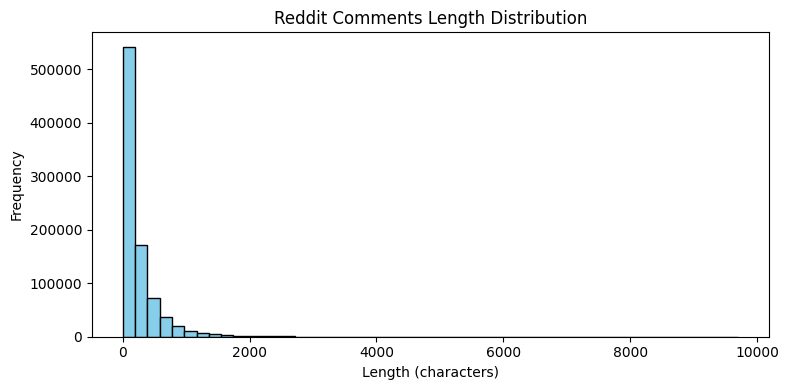

In [88]:
import os
import matplotlib.pyplot as plt

# Ensure reddit_output folder exists
os.makedirs('../output/reddit_output', exist_ok=True)

# Analyze reddit_comments content length
reddit_comments['length'] = reddit_comments['content'].str.len()

plt.figure(figsize=(8,4))
plt.hist(reddit_comments['length'], bins=50, color='skyblue', edgecolor='black')
plt.title('Reddit Comments Length Distribution')
plt.xlabel('Length (characters)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('reddit_output/comments_length_hist.png')


# Save summary statistics for lengths
length_stats = reddit_comments['length'].describe()
print(length_stats)
with open('../output/reddit_output/comments_length_stats.txt', 'w') as f:
    f.write(str(length_stats))

## Reddit Comments Length Distribution

The histogram below shows the distribution of comment lengths in the dataset:

![Reddit Comments Length Histogram](../output/reddit_output/comments_length_hist.png)

**Summary statistics:**
- **Number of comments:** 875,878
- **Mean length:** 250.43 characters
- **Median (50th percentile):** 133 characters
- **Standard deviation:** 360.73
- **Min:** 1
- **25th percentile:** 54
- **75th percentile:** 302
- **Max:** 9,702

**Interpretation:**
- The majority of comments are short, with half being under 133 characters.
- The distribution is highly right-skewed, with a small number of very long comments increasing the mean.
- Most comments fall below 200 characters, while only a few exceed 1,000 characters.
- This suggests that brief interactions are far more common than lengthy discussions in the dataset.

In [55]:
import os
import matplotlib.pyplot as plt

# Make sure reddit_output folder exists
os.makedirs('../output/reddit_output', exist_ok=True)

plt.figure(figsize=(10,6))
plt.hist(reddit_comments['word_count'], bins=100, color='skyblue', edgecolor='black')
plt.title('Reddit Comments Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.xlim(0, 200)

# Save plot before closing
plt.savefig('reddit_output/comments_wordcount_hist.png', bbox_inches='tight')
plt.close()

## Reddit Comments Word Count Distribution

The histogram below shows how many words are in each comment in the dataset:

![Reddit Comments Word Count Histogram](../output/reddit_output/comments_wordcount_hist.png)

**Summary statistics:**
- **Number of comments:** 875,878
- **Mean word count:** 46.92
- **Median word count:** 26
- **Standard deviation:** 66.37
- **Min:** 1
- **25th percentile:** 11
- **75th percentile:** 57
- **Max:** 1,966

**Interpretation:**
- Most comments are quite short, with half of them having 26 words or fewer.
- The average word count is about 47, which is higher than the median because a few very long comments increase the mean.
- Many comments have less than 25 words, and only a small number go beyond 100 words.
- This shows that quick and brief replies are much more common on Reddit than long, detailed comments.

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re
import os
from nltk.corpus import stopwords

# Make sure reddit_output directory exists
os.makedirs('../output/reddit_output', exist_ok=True)

# Combine all comment text
all_comments = reddit_comments['content'].astype(str).str.lower().tolist()

# Remove non-alphabetic characters and tokenize
words = []
for comment in all_comments:
    comment_words = re.findall(r'\b[a-z]{2,}\b', comment)  # words of at least 2 chars
    words.extend(comment_words)

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words]

# Count word frequencies
word_counts = Counter(filtered_words)
most_common = word_counts.most_common(20)

# Print the most common words and their counts
print("Top 20 Most Frequent Words:")
for word, count in most_common:
    print(f"{word}: {count}")

# Prepare for plotting
words_plot, counts_plot = zip(*most_common)

# Plot and save
plt.figure(figsize=(12,6))
plt.bar(words_plot, counts_plot, color='skyblue', edgecolor='black')
plt.title('Top 20 Most Frequent Words in Reddit Comments')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('reddit_output/most_frequent_words.png') # Also show in notebook
plt.close()

Top 20 Most Frequent Words:
like: 206114
im: 168369
dont: 162936
people: 140027
get: 135888
one: 110617
would: 109111
time: 108239
think: 96845
also: 91599
youre: 90576
know: 89528
feel: 85086
even: 81995
good: 80051
really: 79103
want: 75134
make: 72076
way: 71776
thats: 71259


## Top 20 Most Frequent Words in Reddit Comments

![Top 20 Most Frequent Words in Reddit Comments](../output/reddit_output/most_frequent_words.png)

**Interpretation:**
- The most common words in the Reddit comments are conversational and informal, such as "like", "I'm", "don't", "people", and "get".
- Many of these words reflect the personal and opinion-based nature of Reddit comments, with frequent use of words like "think", "feel", "know", and "want".
- The high frequency of words such as "don't", "would", and "also" suggests that users often discuss possibilities, alternatives, and negatives.
- Overall, the vocabulary is dominated by personal pronouns, contractions, and verbs, indicating that Reddit is primarily used for sharing personal experiences, opinions, and advice.

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Make sure reddit_output directory exists
os.makedirs('../output/reddit_output', exist_ok=True)

# Convert 'date' column to datetime if it's not already
reddit_comments['created_datetime'] = pd.to_datetime(reddit_comments['date'])

# Group by day and count comments
comments_per_day = reddit_comments.groupby(reddit_comments['created_datetime'].dt.date).size()

# Plot and save
plt.figure(figsize=(14,6))
plt.plot(comments_per_day.index, comments_per_day.values, marker='o', linestyle='-')
plt.title("Reddit Comments Activity Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Comments")
plt.tight_layout()
plt.savefig('reddit_output/comment_activity_over_time.png')

plt.close()

# Print summary
print(comments_per_day.describe())

count     1507.000000
mean       581.206370
std       3169.873388
min          1.000000
25%         15.000000
50%         52.000000
75%        116.000000
max      46679.000000
dtype: float64


## Reddit Comment Activity Over Time

![Reddit Comment Activity Over Time](../output/reddit_output/comment_activity_over_time.png)

**Interpretation:**
- The time series plot shows a massive increase in the volume of Reddit comments in the most recent period of the dataset.
- For most of the earlier years, daily comment counts were almost negligible, indicating very low activity or sparse data collection during that time.
- A dramatic spike can be seen towards the end, where the number of comments per day rises sharply, reaching a peak of over 45,000 comments in a single day.
- This sudden growth may reflect a recent surge in data collection, a change in scraping strategy, or a period of heightened Reddit activity.
- The plot suggests that most of your analysis will be dominated by recent data, so be cautious about drawing conclusions about long-term trends without accounting for this skew.

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Make sure reddit_output directory exists
os.makedirs('../output/reddit_output', exist_ok=True)

# Count number of comments per post
comments_per_post = reddit_comments.groupby('post_id').size()

# Print summary statistics
print(comments_per_post.describe())

# Plot the distribution
plt.figure(figsize=(12,6))
plt.hist(comments_per_post, bins=50, color='mediumseagreen', edgecolor='black')
plt.title('Distribution of Number of Comments per Post')
plt.xlabel('Number of Comments')
plt.ylabel('Number of Posts')
plt.tight_layout()
plt.savefig('reddit_output/comments_per_post_distribution.png')

plt.close()

count    59713.000000
mean        14.668129
std         16.633395
min          1.000000
25%          2.000000
50%          7.000000
75%         21.000000
max         50.000000
dtype: float64


## Distribution of Comments Per Post

![Distribution of Number of Comments per Post](../output/reddit_output/comments_per_post_distribution.png)

**Interpretation:**
- The histogram shows that the majority of posts have relatively few comments, with a large number of posts receiving just 1–3 comments.
- There is a long tail, with decreasing frequency as the number of comments per post increases up to around 45 comments.
- A noticeable spike occurs at 50 comments per post, which aligns with your scraping strategy of collecting up to 50 comments per post. This spike indicates that many posts had at least 50 comments available and reached your scraping limit.
- The distribution suggests that while most posts have low engagement, a substantial number are popular enough to hit the scraping maximum, possibly representing the most active or viral discussions.
- Overall, this pattern is typical of online discussion platforms: few posts are highly active, but most receive only minimal interaction.

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Make sure reddit_output directory exists
os.makedirs('../output/reddit_output', exist_ok=True)

# Compute average comment length per post
avg_length_per_post = reddit_comments.groupby('post_id')['length'].mean()

# Print summary statistics
print(avg_length_per_post.describe())

# Plot the distribution
plt.figure(figsize=(12,6))
plt.hist(avg_length_per_post, bins=50, color='cornflowerblue', edgecolor='black')
plt.title('Distribution of Average Comment Length per Post')
plt.xlabel('Average Comment Length (characters)')
plt.ylabel('Number of Posts')
plt.tight_layout()
plt.savefig('reddit_output/avg_comment_length_per_post.png')

plt.close()

count    59713.000000
mean       325.700728
std        329.296385
min          6.000000
25%        138.180000
50%        238.000000
75%        397.320000
max       8889.000000
Name: length, dtype: float64


## Distribution of Average Comment Length per Post

![Distribution of Average Comment Length per Post](../output/reddit_output/avg_comment_length_per_post.png)

**Interpretation:**
- The histogram shows that most posts have an average comment length clustered at the lower end of the scale, typically under 500 characters. This indicates that the majority of discussions consist of relatively short comments.
- The distribution has a long right tail, which means that while most posts attract brief comments, there are some posts where the average comment is much longer—sometimes well over 1000 characters.
- The number of posts drops off sharply as the average comment length increases, and only a small number of posts have very high average comment lengths (possibly due to a few exceptionally detailed or verbose discussions).
- This pattern is common in social media datasets, where quick interactions are much more frequent than in-depth engagement.
- Outliers with extremely high average comment lengths should be examined, as they may indicate special topics, formatting artifacts, or even data quality issues.

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Make sure reddit_output directory exists
os.makedirs('../output/reddit_output', exist_ok=True)

# Plot the distribution of comment scores
plt.figure(figsize=(12,6))
plt.hist(reddit_comments['score'], bins=50, color='tomato', edgecolor='black')
plt.title('Distribution of Comment Scores')
plt.xlabel('Comment Score')
plt.ylabel('Number of Comments')
plt.tight_layout()
plt.savefig('reddit_output/comment_score_distribution.png')
plt.close()

# Print summary statistics
print(reddit_comments['score'].describe())

count    875878.000000
mean         21.151123
std         222.611610
min       -1770.000000
25%           1.000000
50%           2.000000
75%           6.000000
max       26997.000000
Name: score, dtype: float64


## Distribution of Comment Scores

![Distribution of Comment Scores](../output/reddit_output/comment_score_distribution.png)

**Interpretation:**
- The histogram shows that the overwhelming majority of comments have low scores, clustered close to zero. This indicates that most comments in your dataset receive little to no attention in terms of upvotes or downvotes.
- There is a very long right tail, with a small number of comments receiving much higher scores—some even reaching into the thousands or beyond. These outliers represent highly upvoted, popular comments.
- The left tail (negative scores) is either minimal or not visible, suggesting relatively few comments are heavily downvoted.
- The sharp concentration near zero is typical for large online discussion datasets, where most user contributions receive minimal feedback, and only a select few comments become highly visible or appreciated by the community.
- For further insight, you may want to zoom in on the range around zero to better distinguish the distribution of low and negative scores.

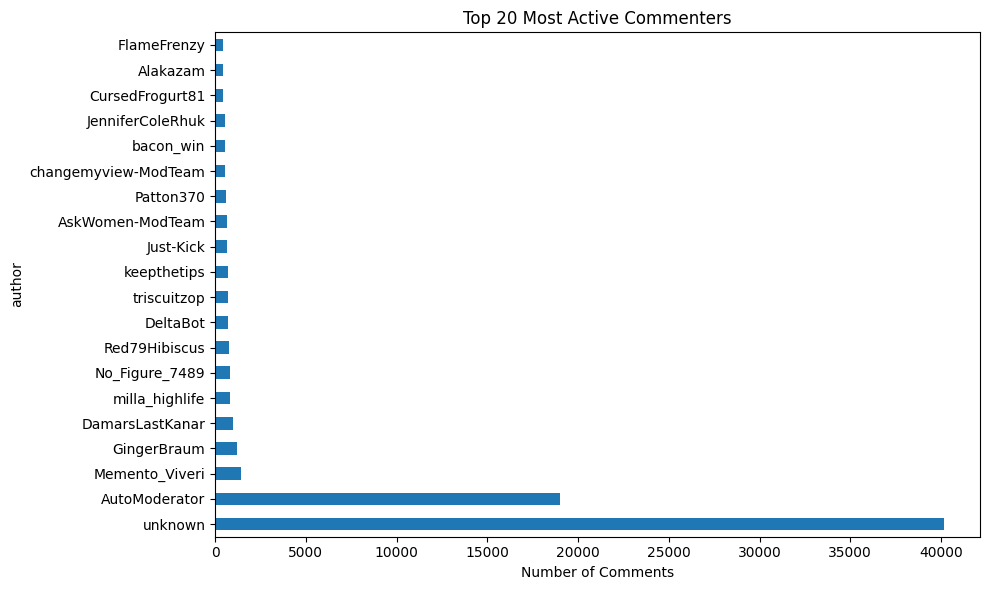

In [72]:
top_authors = reddit_comments['author'].value_counts().head(20)
top_authors.plot(kind='barh', figsize=(10,6), title='Top 20 Most Active Commenters')
plt.xlabel('Number of Comments')
plt.tight_layout()
plt.show()

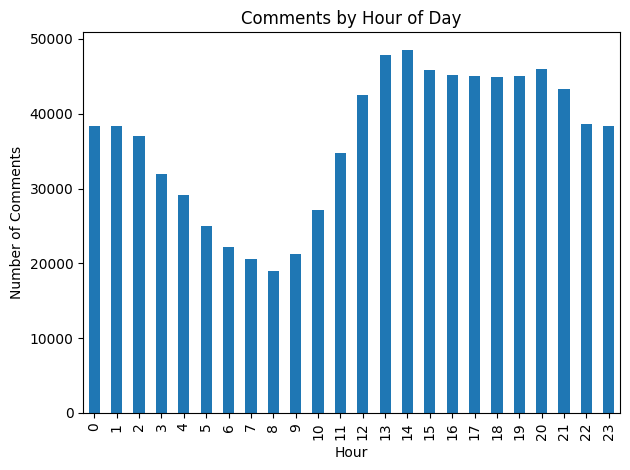

In [73]:
reddit_comments['created_datetime'] = pd.to_datetime(reddit_comments['date'])
reddit_comments['hour'] = reddit_comments['created_datetime'].dt.hour
reddit_comments['weekday'] = reddit_comments['created_datetime'].dt.day_name()
reddit_comments['hour'].value_counts().sort_index().plot(kind='bar', title='Comments by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Comments')
plt.tight_layout()
plt.show()

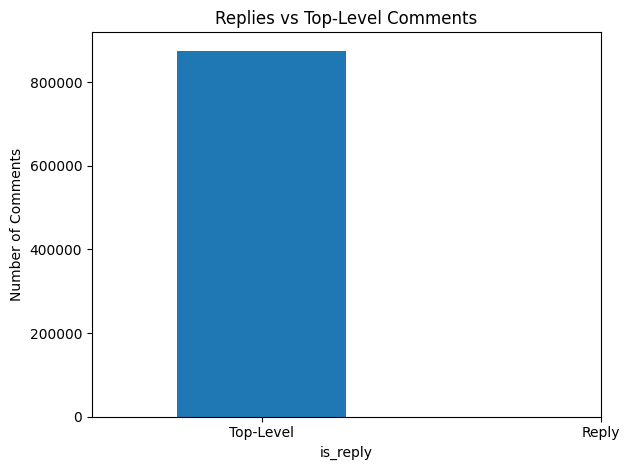

In [74]:
is_reply = reddit_comments['parent_id'] != reddit_comments['post_id']
reddit_comments['is_reply'] = is_reply
reddit_comments['is_reply'].value_counts().plot(kind='bar', title='Replies vs Top-Level Comments')
plt.xticks([0,1], ['Top-Level', 'Reply'], rotation=0)
plt.ylabel('Number of Comments')
plt.tight_layout()
plt.show()

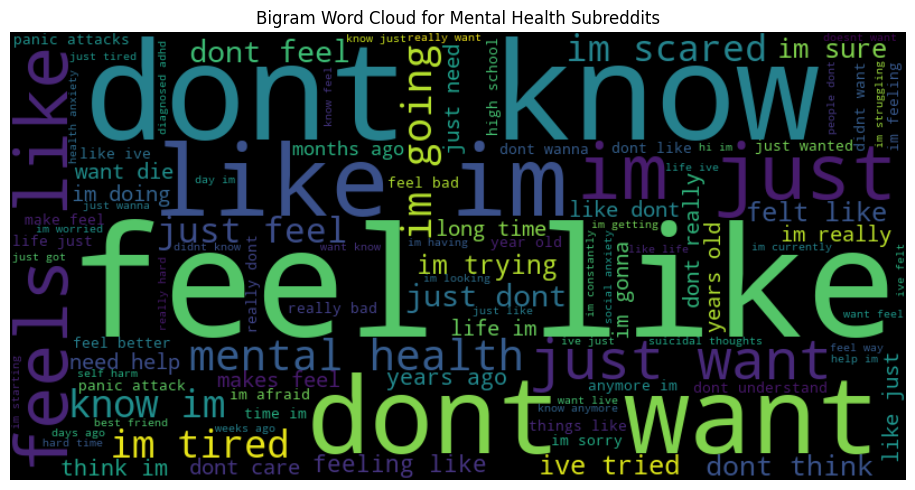

In [96]:
from sklearn.feature_extraction.text import CountVectorizer

texts = mh_posts['content'].dropna().astype(str)
vectorizer = CountVectorizer(stop_words='english', ngram_range=(2,2), max_features=100)
X = vectorizer.fit_transform(texts)
bigrams = vectorizer.get_feature_names_out()
frequencies = X.sum(axis=0).A1

import matplotlib.pyplot as plt
from wordcloud import WordCloud

bigram_dict = dict(zip(bigrams, frequencies))
wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(bigram_dict)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Bigram Word Cloud for Mental Health Subreddits")
plt.tight_layout()
plt.show()

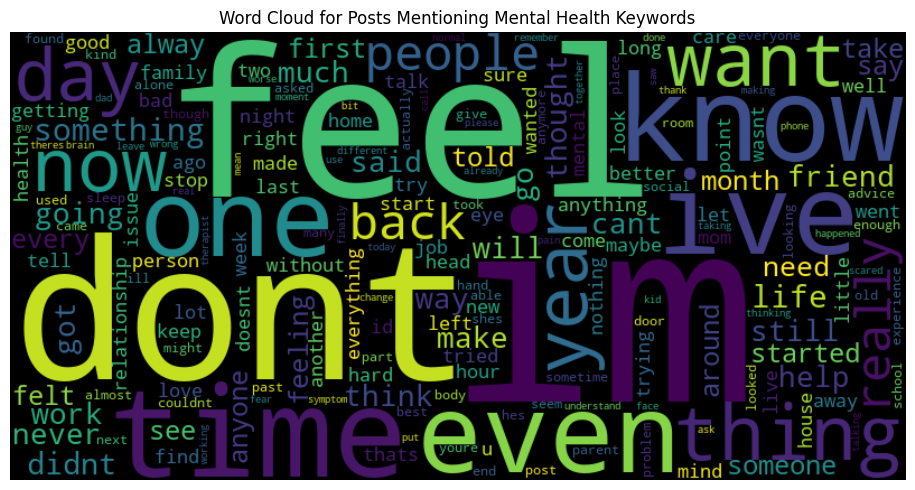

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import os

# Define relevant mental health keywords
mh_keywords = ['depression', 'anxiety', 'adhd', 'therapy', 'diagnosis', 'stress', 'bpd', 'bipolar', 'panic', 'medication', 'disorder', 'ocd', 'counseling']

# Convert posts to lowercase for matching
reddit_posts['content_lower'] = reddit_posts['content'].astype(str).str.lower()

# Filter posts containing any of the keywords
mask = reddit_posts['content_lower'].apply(lambda x: any(word in x for word in mh_keywords))
mh_keyword_posts = reddit_posts[mask]

# Combine all relevant posts into a single text
text = " ".join(mh_keyword_posts['content'].dropna().astype(str))

# Generate word cloud
os.makedirs('../output/reddit_output', exist_ok=True)
custom_stopwords = STOPWORDS.union(set(mh_keywords))  # Optionally exclude the keywords themselves
wordcloud = WordCloud(width=800, height=400, background_color='black', stopwords=custom_stopwords, collocations=False).generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Posts Mentioning Mental Health Keywords")
plt.tight_layout()
plt.savefig('reddit_output/wordcloud_mh_keywords.png')
plt.show()
plt.close()

C:\Users\aipro\AppData\Local\Temp\ipykernel_9660\2448899371.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=posts_per_subreddit.index, y=posts_per_subreddit.values, palette='Spectral')


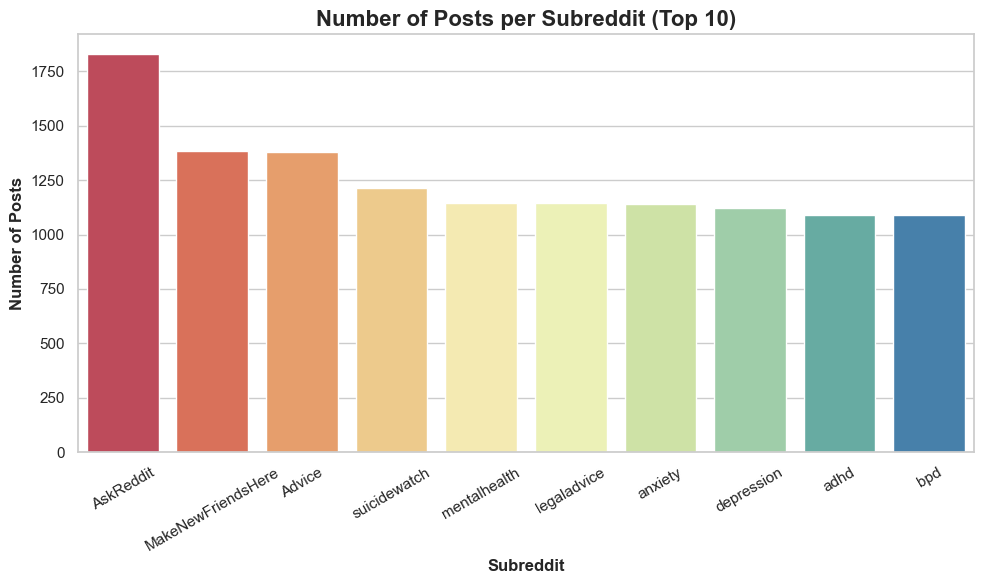

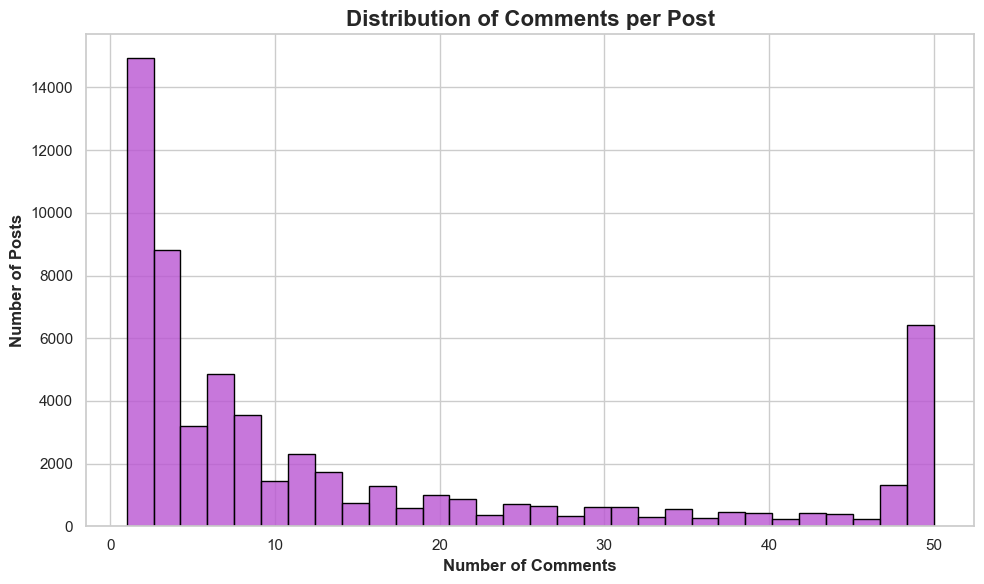

Saved colourful plots for your slides in the 'reddit_output' folder!


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load cleaned data (update the paths if needed)
reddit_posts = pd.read_csv('reddit_posts_clean.csv')
reddit_comments = pd.read_csv('reddit_comments_clean.csv')

# Ensure 'reddit_output' folder exists
os.makedirs('../output/reddit_output', exist_ok=True)

# --- Bar Chart: Number of Posts per Subreddit ---
# If your subreddit column is named 'category' or 'subreddit', adjust accordingly
subreddit_col = 'category' if 'category' in reddit_posts.columns else 'subreddit'
posts_per_subreddit = reddit_posts[subreddit_col].value_counts().head(10)  # Top 10 for clarity

plt.figure(figsize=(10,6))
sns.barplot(x=posts_per_subreddit.index, y=posts_per_subreddit.values, palette='Spectral')
plt.title('Number of Posts per Subreddit (Top 10)', fontsize=16, fontweight='bold')
plt.xlabel('Subreddit', fontsize=12, fontweight='bold')
plt.ylabel('Number of Posts', fontsize=12, fontweight='bold')
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig('reddit_output/posts_per_subreddit_slide.png')
plt.show()

# --- Histogram: Distribution of Comments per Post ---
comments_per_post = reddit_comments.groupby('post_id').size()

plt.figure(figsize=(10,6))
sns.histplot(comments_per_post, bins=30, color='mediumorchid', edgecolor='black', alpha=0.8)
plt.title('Distribution of Comments per Post', fontsize=16, fontweight='bold')
plt.xlabel('Number of Comments', fontsize=12, fontweight='bold')
plt.ylabel('Number of Posts', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.savefig('reddit_output/comments_per_post_slide.png')
plt.show()

print("Saved colourful plots for your slides in the 'reddit_output' folder!")

In [7]:
print(reddit_posts.head(5))          # Show first 5 posts
print(reddit_comments.sample(5))     # Show 5 random comments

   post_id                                            content  \
0  1m1puv4  is she sabotaging things i dont know what to d...   
1  1m1osj2  i just crave the silence all i crave is silenc...   
2  1m1nymh  being an addict around worse addicts 18 uk  i ...   
3  1m1ng2l  how to overcome any type on addiction  for the...   
4  1m1k697  found zyn in my dads drawer accidentally what ...   

                 author                 date   category  num_comments  score  \
0              Artistlk  2025-07-16 21:57:52  addiction             0      1   
1  Exciting-Parsley-476  2025-07-16 21:14:59  addiction             1      1   
2  Particular-Truck7897  2025-07-16 20:42:13  addiction             1      1   
3   Effective-Vast-5050  2025-07-16 20:22:05  addiction             3      3   
4           DanDaDanFan  2025-07-16 18:17:54  addiction            24      0   

   upvote_ratio                                                url  
0           1.0  https://www.reddit.com/r/addiction/comment

In [10]:
print(reddit_posts.head(5).to_markdown())

|    | post_id   | content                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

C:\Users\aipro\AppData\Local\Temp\ipykernel_9660\1277864700.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_subs.index, y=top_subs.values, palette='cubehelix')


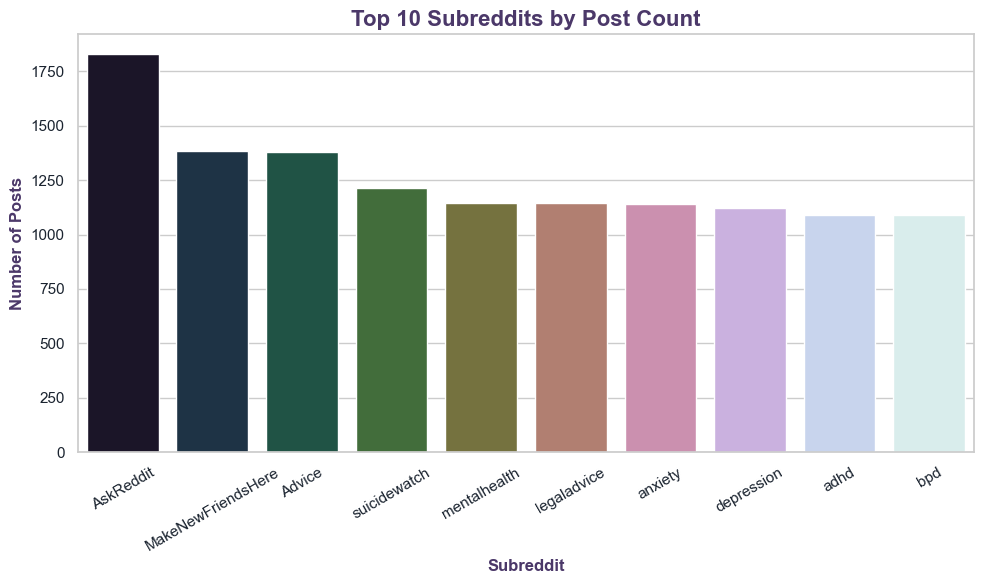

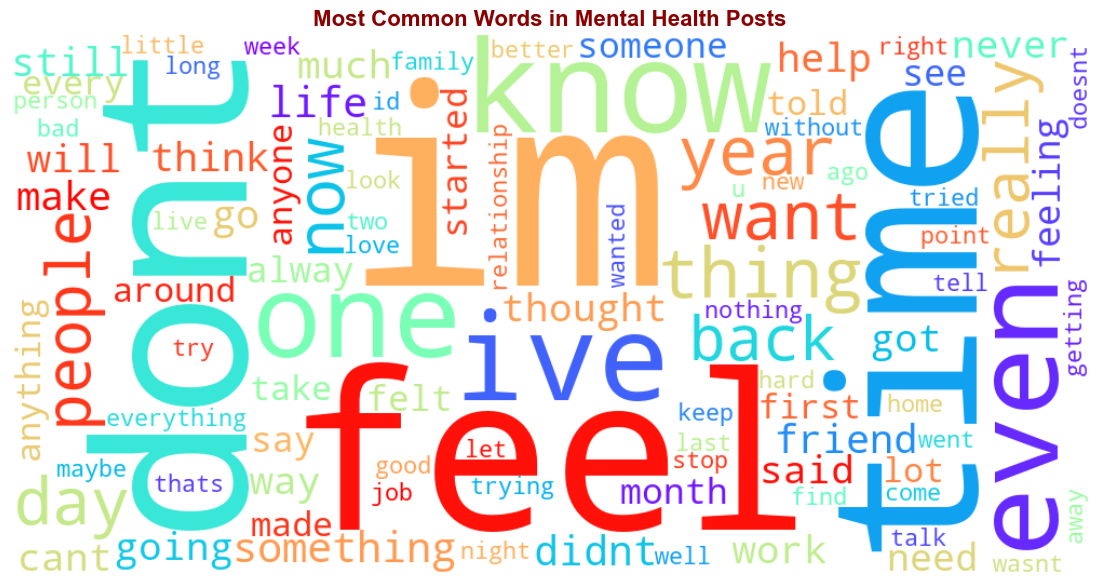

Colourful bar chart and word cloud saved in reddit_output/


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import os

# Load cleaned posts data
reddit_posts = pd.read_csv('reddit_posts_clean.csv')

# Ensure output folder exists
os.makedirs('../output/reddit_output', exist_ok=True)

# --- 1. BAR CHART: Top 10 Subreddits by Post Count ---
subreddit_col = 'category' if 'category' in reddit_posts.columns else 'subreddit'
top_subs = reddit_posts[subreddit_col].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_subs.index, y=top_subs.values, palette='cubehelix')
plt.title('Top 10 Subreddits by Post Count', fontsize=16, fontweight='bold', color='#4B3869')
plt.xlabel('Subreddit', fontsize=12, fontweight='bold', color='#4B3869')
plt.ylabel('Number of Posts', fontsize=12, fontweight='bold', color='#4B3869')
plt.xticks(rotation=30, color='#1B2430')
plt.yticks(color='#1B2430')
plt.tight_layout()
plt.savefig('reddit_output/top_subreddits_bar.png')
plt.show()

# --- 2. WORD CLOUD: Most Common Words in Mental Health Posts ---
# Define keywords for mental health filtering (customize if you wish)
mh_keywords = ['depression', 'anxiety', 'adhd', 'therapy', 'diagnosis', 'stress', 'bpd', 'bipolar', 'panic', 'medication', 'disorder', 'ocd', 'counseling']
reddit_posts['content_lower'] = reddit_posts['content'].astype(str).str.lower()
mask = reddit_posts['content_lower'].apply(lambda x: any(word in x for word in mh_keywords))
mh_posts = reddit_posts[mask]

text = " ".join(mh_posts['content'].dropna().astype(str))
custom_stopwords = STOPWORDS.union(set(mh_keywords))  # Optionally exclude the keywords themselves

wordcloud = WordCloud(width=1000, height=500, background_color='white', colormap='rainbow',
                      stopwords=custom_stopwords, collocations=False, max_words=100).generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Mental Health Posts", fontsize=16, fontweight='bold', color='darkred')
plt.tight_layout()
plt.savefig('reddit_output/mh_wordcloud.png')
plt.show()

print("Colourful bar chart and word cloud saved in reddit_output/")

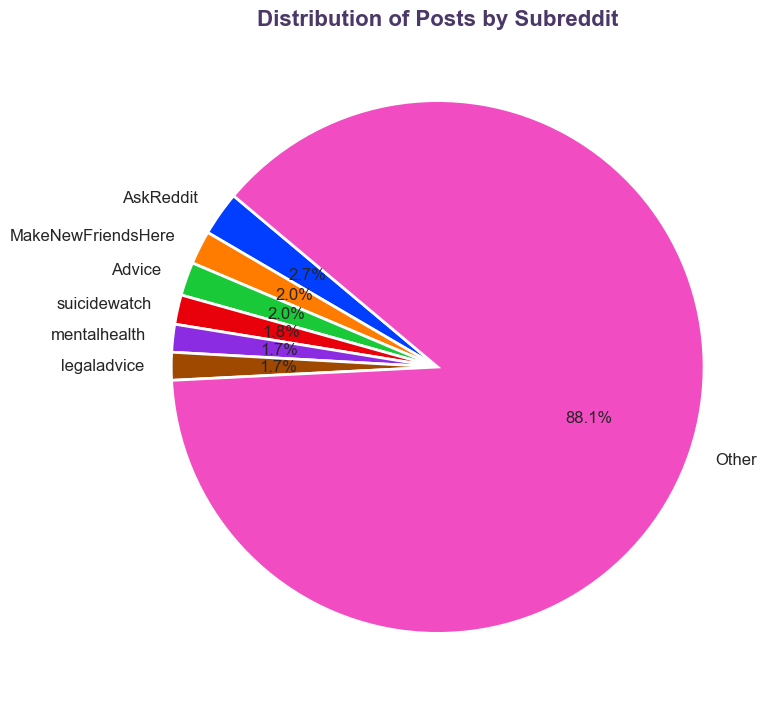

Pie chart saved in reddit_output/subreddit_piechart.png


In [12]:
 import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load your cleaned posts data
reddit_posts = pd.read_csv('reddit_posts_clean.csv')

# Use 'category' if that's your subreddit column, otherwise use 'subreddit'
subreddit_col = 'category' if 'category' in reddit_posts.columns else 'subreddit'

# Get top 6 subreddits for pie chart clarity
top_subs = reddit_posts[subreddit_col].value_counts().head(6)
other_count = len(reddit_posts) - top_subs.sum()

labels = list(top_subs.index) + ['Other']
sizes = list(top_subs.values) + [other_count]
colors = sns.color_palette('bright', len(labels))

plt.figure(figsize=(8,8))
wedges, texts, autotexts = plt.pie(
    sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140,
    wedgeprops={'edgecolor':'white', 'linewidth':2}, textprops={'fontsize':12}
)
plt.title('Distribution of Posts by Subreddit', fontsize=16, fontweight='bold', color='#4B3869')
plt.tight_layout()
plt.savefig('reddit_output/subreddit_piechart.png')
plt.show()

print("Pie chart saved in reddit_output/subreddit_piechart.png")

In [19]:
# Full Reddit Data Preprocessing Pipeline (No Tokenization/Lemmatization)
# -------------------------------------------------------------
import pandas as pd
import re
import html
import os

# Load your data
reddit_posts = pd.read_csv('reddit_posts.csv')
reddit_comments = pd.read_csv('reddit_comments.csv')

# Remove duplicates by ID
reddit_posts = reddit_posts.drop_duplicates(subset=['post_id']).reset_index(drop=True)
reddit_comments = reddit_comments.drop_duplicates(subset=['comment_id']).reset_index(drop=True)

# Remove '[deleted]' and '[removed]'
reddit_posts = reddit_posts[~reddit_posts['content'].isin(['[deleted]', '[removed]'])]
reddit_comments = reddit_comments[~reddit_comments['content'].isin(['[deleted]', '[removed]'])]

# Remove empty or very short content (<=5 chars)
reddit_posts = reddit_posts[reddit_posts['content'].str.strip().str.len() > 5]
reddit_comments = reddit_comments[reddit_comments['content'].str.strip().str.len() > 5]

# Normalize text: lowercase & strip whitespace
reddit_posts['content'] = reddit_posts['content'].str.lower().str.strip()
reddit_comments['content'] = reddit_comments['content'].str.lower().str.strip()
if 'title' in reddit_posts.columns:
    reddit_posts['title'] = reddit_posts['title'].str.lower().str.strip()

# Remove URLs from content and title
reddit_posts['content'] = reddit_posts['content'].str.replace(r'http\S+|www\S+', '', regex=True)
reddit_comments['content'] = reddit_comments['content'].str.replace(r'http\S+|www\S+', '', regex=True)
if 'title' in reddit_posts.columns:
    reddit_posts['title'] = reddit_posts['title'].str.replace(r'http\S+|www\S+', '', regex=True)

# Remove user and subreddit mentions
reddit_posts['content'] = reddit_posts['content'].str.replace(r'/u/\w+', '', regex=True)
reddit_posts['content'] = reddit_posts['content'].str.replace(r'/r/\w+', '', regex=True)

# Unescape HTML entities
reddit_posts['content'] = reddit_posts['content'].apply(html.unescape)
reddit_comments['content'] = reddit_comments['content'].apply(html.unescape)
if 'title' in reddit_posts.columns:
    reddit_posts['title'] = reddit_posts['title'].apply(html.unescape)

# Remove markdown formatting from content
reddit_posts['content'] = reddit_posts['content'].str.replace(r'\*\*(.*?)\*\*|\*(.*?)\*|\[(.*?)\]\(.*?\)|!\[(.*?)\]\(.*?\)', '', regex=True)

# Remove excessive repeated characters (e.g., "soooo coool!!!")
reddit_posts['content'] = reddit_posts['content'].str.replace(r'(.)\1{2,}', r'\1\1', regex=True)
reddit_comments['content'] = reddit_comments['content'].str.replace(r'(.)\1{2,}', r'\1\1', regex=True)

# Limit exclamation marks to one
reddit_posts['content'] = reddit_posts['content'].str.replace(r'!{2,}', '!', regex=True)
reddit_comments['content'] = reddit_comments['content'].str.replace(r'!{2,}', '!', regex=True)

# Remove special characters except basic punctuation
reddit_posts['content'] = reddit_posts['content'].str.replace(r'[^a-zA-Z0-9\s.,!?]', '', regex=True)
reddit_comments['content'] = reddit_comments['content'].str.replace(r'[^a-zA-Z0-9\s.,!?]', '', regex=True)

# Remove stopwords for analysis (optional; keep original text for further tasks)
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = text.split()
    return ' '.join([w for w in words if w not in stop_words])

reddit_posts['content_nostop'] = reddit_posts['content'].apply(remove_stopwords)
reddit_comments['content_nostop'] = reddit_comments['content'].apply(remove_stopwords)

# Save cleaned data
reddit_posts.to_csv('reddit_posts_clean.csv', index=False)
reddit_comments.to_csv('reddit_comments_clean.csv', index=False)

print("Reddit posts and comments cleaned & saved!")

FileNotFoundError: [Errno 2] No such file or directory: 'reddit_posts.csv'

In [20]:
reddit_posts = pd.read_csv('../Data/Reddit/reddit_posts.csv')
reddit_comments = pd.read_csv('../Data/Reddit/reddit_comments.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../Data/Reddit/reddit_posts.csv'

In [21]:
# Tokenization & Lemmatization for NLP Tasks
# ------------------------------------------
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# If not already downloaded:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Load cleaned data
reddit_posts = pd.read_csv('reddit_posts_clean.csv')
reddit_comments = pd.read_csv('reddit_comments_clean.csv')

lemmatizer = WordNetLemmatizer()

def tokenize_and_lemmatize(text):
    tokens = word_tokenize(str(text))
    lemmas = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmas)

# Apply to main text columns (use 'content_nostop' for NLP, or 'content' for raw)
reddit_posts['content_lemmatized'] = reddit_posts['content_nostop'].apply(tokenize_and_lemmatize)
reddit_comments['content_lemmatized'] = reddit_comments['content_nostop'].apply(tokenize_and_lemmatize)

# Save with new columns
reddit_posts.to_csv('reddit_posts_lemmatized.csv', index=False)
reddit_comments.to_csv('reddit_comments_lemmatized.csv', index=False)

print("Tokenization and lemmatization complete! Data saved for NLP tasks.")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aipro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aipro\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\aipro\AppData\Roaming\nltk_data...


KeyError: 'content_nostop'

In [22]:
import pandas as pd
import os

# Define the base data directory
data_dir = "../Data/Reddit"

# Example: Read posts and comments for a specific subreddit/topic (e.g., "anxiety")
posts_file = os.path.join(data_dir, "anxiety_posts.csv")
comments_file = os.path.join(data_dir, "anxiety_comments.csv")

# Read the CSV files
anxiety_posts = pd.read_csv(posts_file)
anxiety_comments = pd.read_csv(comments_file)

# Show info
print("Anxiety Posts shape:", anxiety_posts.shape)
print("Anxiety Comments shape:", anxiety_comments.shape)
print("Posts columns:", anxiety_posts.columns)
print("Comments columns:", anxiety_comments.columns)

# You can repeat for any other topic/subreddit by changing the filenames!
# Example for "adhd":
adhd_posts = pd.read_csv(os.path.join(data_dir, "adhd_posts.csv"))
adhd_comments = pd.read_csv(os.path.join(data_dir, "adhd_comments.csv"))

print("ADHD Posts shape:", adhd_posts.shape)
print("ADHD Comments shape:", adhd_comments.shape)

Anxiety Posts shape: (1140, 9)
Anxiety Comments shape: (4897, 10)
Posts columns: Index(['post_id', 'content', 'author', 'date', 'category', 'num_comments',
       'score', 'upvote_ratio', 'url'],
      dtype='object')
Comments columns: Index(['comment_id', 'post_id', 'content', 'author', 'date', 'order', 'score',
       'parent_id', 'link_id', 'permalink'],
      dtype='object')
ADHD Posts shape: (1090, 9)
ADHD Comments shape: (11930, 10)


In [23]:
import pandas as pd
import nltk

# Download required NLTK resources (only once)
nltk.download('punkt')

# Load cleaned data
reddit_posts = pd.read_csv('reddit_posts_clean.csv')
reddit_comments = pd.read_csv('reddit_comments_clean.csv')

# Tokenization function
def tokenize_text(text):
    tokens = nltk.word_tokenize(str(text))
    return tokens

# Apply tokenization and count words for posts
reddit_posts['tokens'] = reddit_posts['content'].apply(tokenize_text)
reddit_posts['word_count'] = reddit_posts['tokens'].apply(len)

# Apply tokenization and count words for comments
reddit_comments['tokens'] = reddit_comments['content'].apply(tokenize_text)
reddit_comments['word_count'] = reddit_comments['tokens'].apply(len)

# Save results
reddit_posts.to_csv('reddit_posts_tokenized.csv', index=False)
reddit_comments.to_csv('reddit_comments_tokenized.csv', index=False)

print("Tokenization and word count completed and saved!")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aipro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Tokenization and word count completed and saved!


In [24]:
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer

# Download required NLTK resources (only once)
nltk.download('wordnet')
nltk.download('omw-1.4')

# Load tokenized data
reddit_posts = pd.read_csv('reddit_posts_tokenized.csv')
reddit_comments = pd.read_csv('reddit_comments_tokenized.csv')

# If tokens are saved as strings, convert them back to lists
import ast
reddit_posts['tokens'] = reddit_posts['tokens'].apply(ast.literal_eval)
reddit_comments['tokens'] = reddit_comments['tokens'].apply(ast.literal_eval)

lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

# Apply lemmatization for posts
reddit_posts['lemmas'] = reddit_posts['tokens'].apply(lemmatize_tokens)

# Apply lemmatization for comments
reddit_comments['lemmas'] = reddit_comments['tokens'].apply(lemmatize_tokens)

# Save results
reddit_posts.to_csv('reddit_posts_lemmatized.csv', index=False)
reddit_comments.to_csv('reddit_comments_lemmatized.csv', index=False)

print("Lemmatization completed and saved!")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aipro\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\aipro\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Lemmatization completed and saved!


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aipro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aipro\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\aipro\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


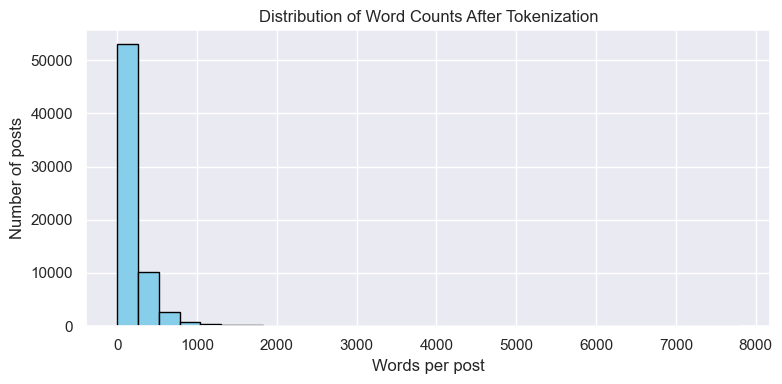

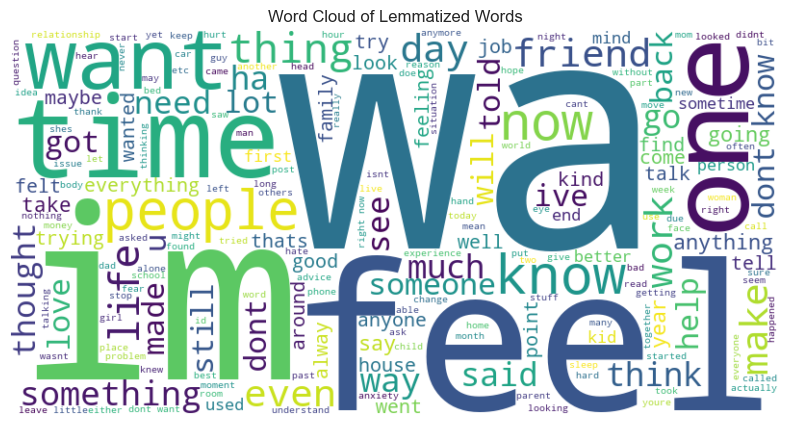

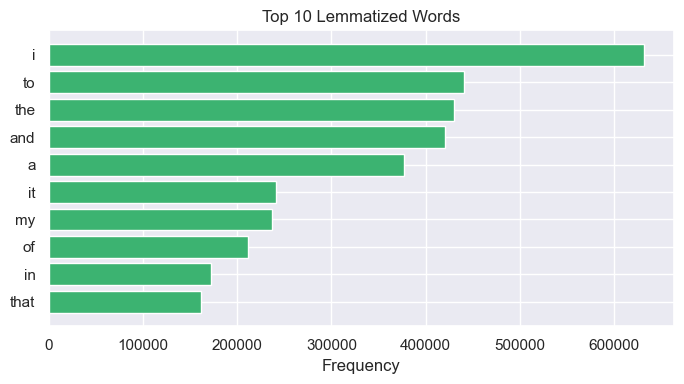

Original tokens vs. Lemmas (sample rows):
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         tokens                                                                                                                                                                                                                                                                                                                                                               

In [25]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Load your preprocessed data (replace with your actual file paths)
posts = pd.read_csv("reddit_posts_lemmatized.csv")

# If tokens/lemmas are saved as strings, convert to lists
import ast
if isinstance(posts['tokens'].iloc[0], str):
    posts['tokens'] = posts['tokens'].apply(ast.literal_eval)
if isinstance(posts['lemmas'].iloc[0], str):
    posts['lemmas'] = posts['lemmas'].apply(ast.literal_eval)

# 1. Histogram of word counts (tokenization)
plt.figure(figsize=(8, 4))
plt.hist(posts['word_count'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Words per post')
plt.ylabel('Number of posts')
plt.title('Distribution of Word Counts After Tokenization')
plt.tight_layout()
plt.show()

# 2. Word Cloud of lemmatized words
all_lemmas = [lemma for lemmas in posts['lemmas'] for lemma in lemmas]
text_lemmas = ' '.join(all_lemmas)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_lemmas)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Lemmatized Words')
plt.show()

# 3. Bar plot for top 10 lemmatized words
lemma_counts = Counter(all_lemmas)
top_lemmas = lemma_counts.most_common(10)
labels, values = zip(*top_lemmas)
plt.figure(figsize=(7, 4))
plt.barh(labels, values, color='mediumseagreen')
plt.xlabel('Frequency')
plt.title('Top 10 Lemmatized Words')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 4. Table: example of tokens before and after lemmatization
sample = posts[['tokens', 'lemmas']].sample(3, random_state=42)
print("Original tokens vs. Lemmas (sample rows):")
print(sample.to_string(index=False))